In [362]:
# Simple parse of the 'games.json' file.
import os
import json

import sns

dataset = {}
if os.path.exists('games.json'):
  with open('games.json', 'r', encoding='utf-8') as fin:
    text = fin.read()
    if len(text) > 0:
      dataset = json.loads(text)

for app in dataset:
  appID = app                                         # AppID, unique identifier for each app (string).
  game = dataset[app]             

  name = game['name']                                 # Game name (string).
  releaseDate = game['release_date']                  # Release date (string).
  estimatedOwners = game['estimated_owners']          # Estimated owners (string, e.g.: "0 - 20000").
  peakCCU = game['peak_ccu']                          # Number of concurrent users, yesterday (int).
  required_age = game['required_age']                 # Age required to play, 0 if it is for all audiences (int).
  price = game['price']                               # Price in USD, 0.0 if its free (float).
  dlcCount = game['dlc_count']                        # Number of DLCs, 0 if you have none (int).
  longDesc = game['detailed_description']             # Detailed description of the game (string).
  shortDesc = game['short_description']               # Brief description of the game,
                                                      # does not contain HTML tags (string).
  languages = game['supported_languages']             # Comma-separated enumeration of supporting languages.
  fullAudioLanguages = game['full_audio_languages']   # Comma-separated enumeration of languages with audio support.
  reviews = game['reviews']                           #
  headerImage = game['header_image']                  # Header image URL in the store (string).
  website = game['website']                           # Game website (string).
  supportWeb = game['support_url']                    # Game support URL (string).
  supportEmail = game['support_email']                # Game support email (string).
  supportWindows = game['windows']                    # Does it support Windows? (bool).
  supportMac = game['mac']                            # Does it support Mac? (bool).
  supportLinux = game['linux']                        # Does it support Linux? (bool).
  metacriticScore = game['metacritic_score']          # Metacritic score, 0 if it has none (int).
  metacriticURL = game['metacritic_url']              # Metacritic review URL (string).
  userScore = game['user_score']                      # Users score, 0 if it has none (int).
  positive = game['positive']                         # Positive votes (int).
  negative = game['negative']                         # Negative votes (int).
  scoreRank = game['score_rank']                      # Score rank of the game based on user reviews (string).
  achievements = game['achievements']                 # Number of achievements, 0 if it has none (int).
  recommens = game['recommendations']                 # User recommendations, 0 if it has none (int).
  notes = game['notes']                               # Extra information about the game content (string).
  averagePlaytime = game['average_playtime_forever']  # Average playtime since March 2009, in minutes (int).
  averageplaytime2W = game['average_playtime_2weeks'] # Average playtime in the last two weeks, in minutes (int).
  medianPlaytime = game['median_playtime_forever']    # Median playtime since March 2009, in minutes (int).
  medianPlaytime2W = game['median_playtime_2weeks']   # Median playtime in the last two weeks, in minutes (int).

  packages = game['packages']                         # Available packages.
  for pack in packages:           
    title = pack['title']                             # Package title (string).
    packDesc = pack['description']                    # Package description (string).

    subs = pack['subs']                               # Subpackages.
    for sub in subs:            
      text = sub['text']                              # Subpackage title (string).
      subDesc = sub['description']                    # Subpackage description (string).
      subPrice = sub['price']                         # Subpackage price in USD (float).

  developers = game['developers']                     # Game developers.
  for developer in developers:            
    developerName = developer                         # Developer name (string).

  publishers = game['publishers']                     # Game publishers.
  for publisher in publishers:            
    publisherName = publisher                         # Publisher name (string).

  categories = game['categories']                     # Game categories.
  for category in categories:           
    categoryName = category                           # Category name (string).

  genres = game['genres']                             # Game genres.
  for gender in genres:           
    genderName = gender                               # Gender name (string).

  screenshots = game['screenshots']                   # Game screenshots.
  for screenshot in screenshots:            
    screenshotsURL = screenshot                       # Game screenshot URL (string).

  movies = game['movies']                             # Game movies.
  for movie in movies:            
    movieURL = movie                                  # Game movie URL (string).

  tags = game['tags']                                 # Tags.
  for tag in tags:           
    tagKey = tag                                      # Tag key (string, int).


In [425]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

def getIdxs(string,list):
  return [i for i, s in enumerate(list) if string in s]

def truthTable(list1,list2):
  return [i for i in list1 if i in list2]

def idx2intidx(list,lst_idx):
  return [list[i] for i in lst_idx]
  
genres = []
categories = []
tags = []
names = []
price = []
positive = []
negative = []
averagePlaytime = []
score_metacritic = []
score_user = []
owners_number = []
for i,app in enumerate(dataset):
  appID = app                                         # AppID, unique identifier for each app (string).
  game = dataset[app]    

  genres.append(game['genres'])
  categories.append(game['categories'])  
  tags.append(game['tags'])  # Game categories.
  names.append(game['name']) 
  price.append(game['price'])
  positive.append(game['positive'])                       # Positive votes (int).
  negative.append(game['negative'])
  averagePlaytime.append(game['average_playtime_forever'])
  score_metacritic.append(game['metacritic_score'])
  score_user.append(game['user_score'])
  owners_number.append(game['estimated_owners'])
  


idx_top_genre_indie = getIdxs('Indie',genres)
idx_top_genre_rpg = getIdxs('RPG',genres)
idx_themes_moods_fantasy = getIdxs('Fantasy',tags)
idx_themes_moods_loot = getIdxs('Loot',tags)
idx_themes_moods_Tactical = getIdxs('Tactical',tags)
idx_single_player = getIdxs('Single-player',categories)
idx_single_online_coop = getIdxs('Online Co-op',categories)
idx_Dungeon_Crawler = getIdxs('Dungeon Crawler',tags)
idx_crpgs = getIdxs('CRPG',tags)
idx_roguelike = getIdxs('Rogue-like',tags)
idx_board_game = getIdxs('Board Game',tags)
idx_hex_grid = getIdxs('Hex Grid',tags)

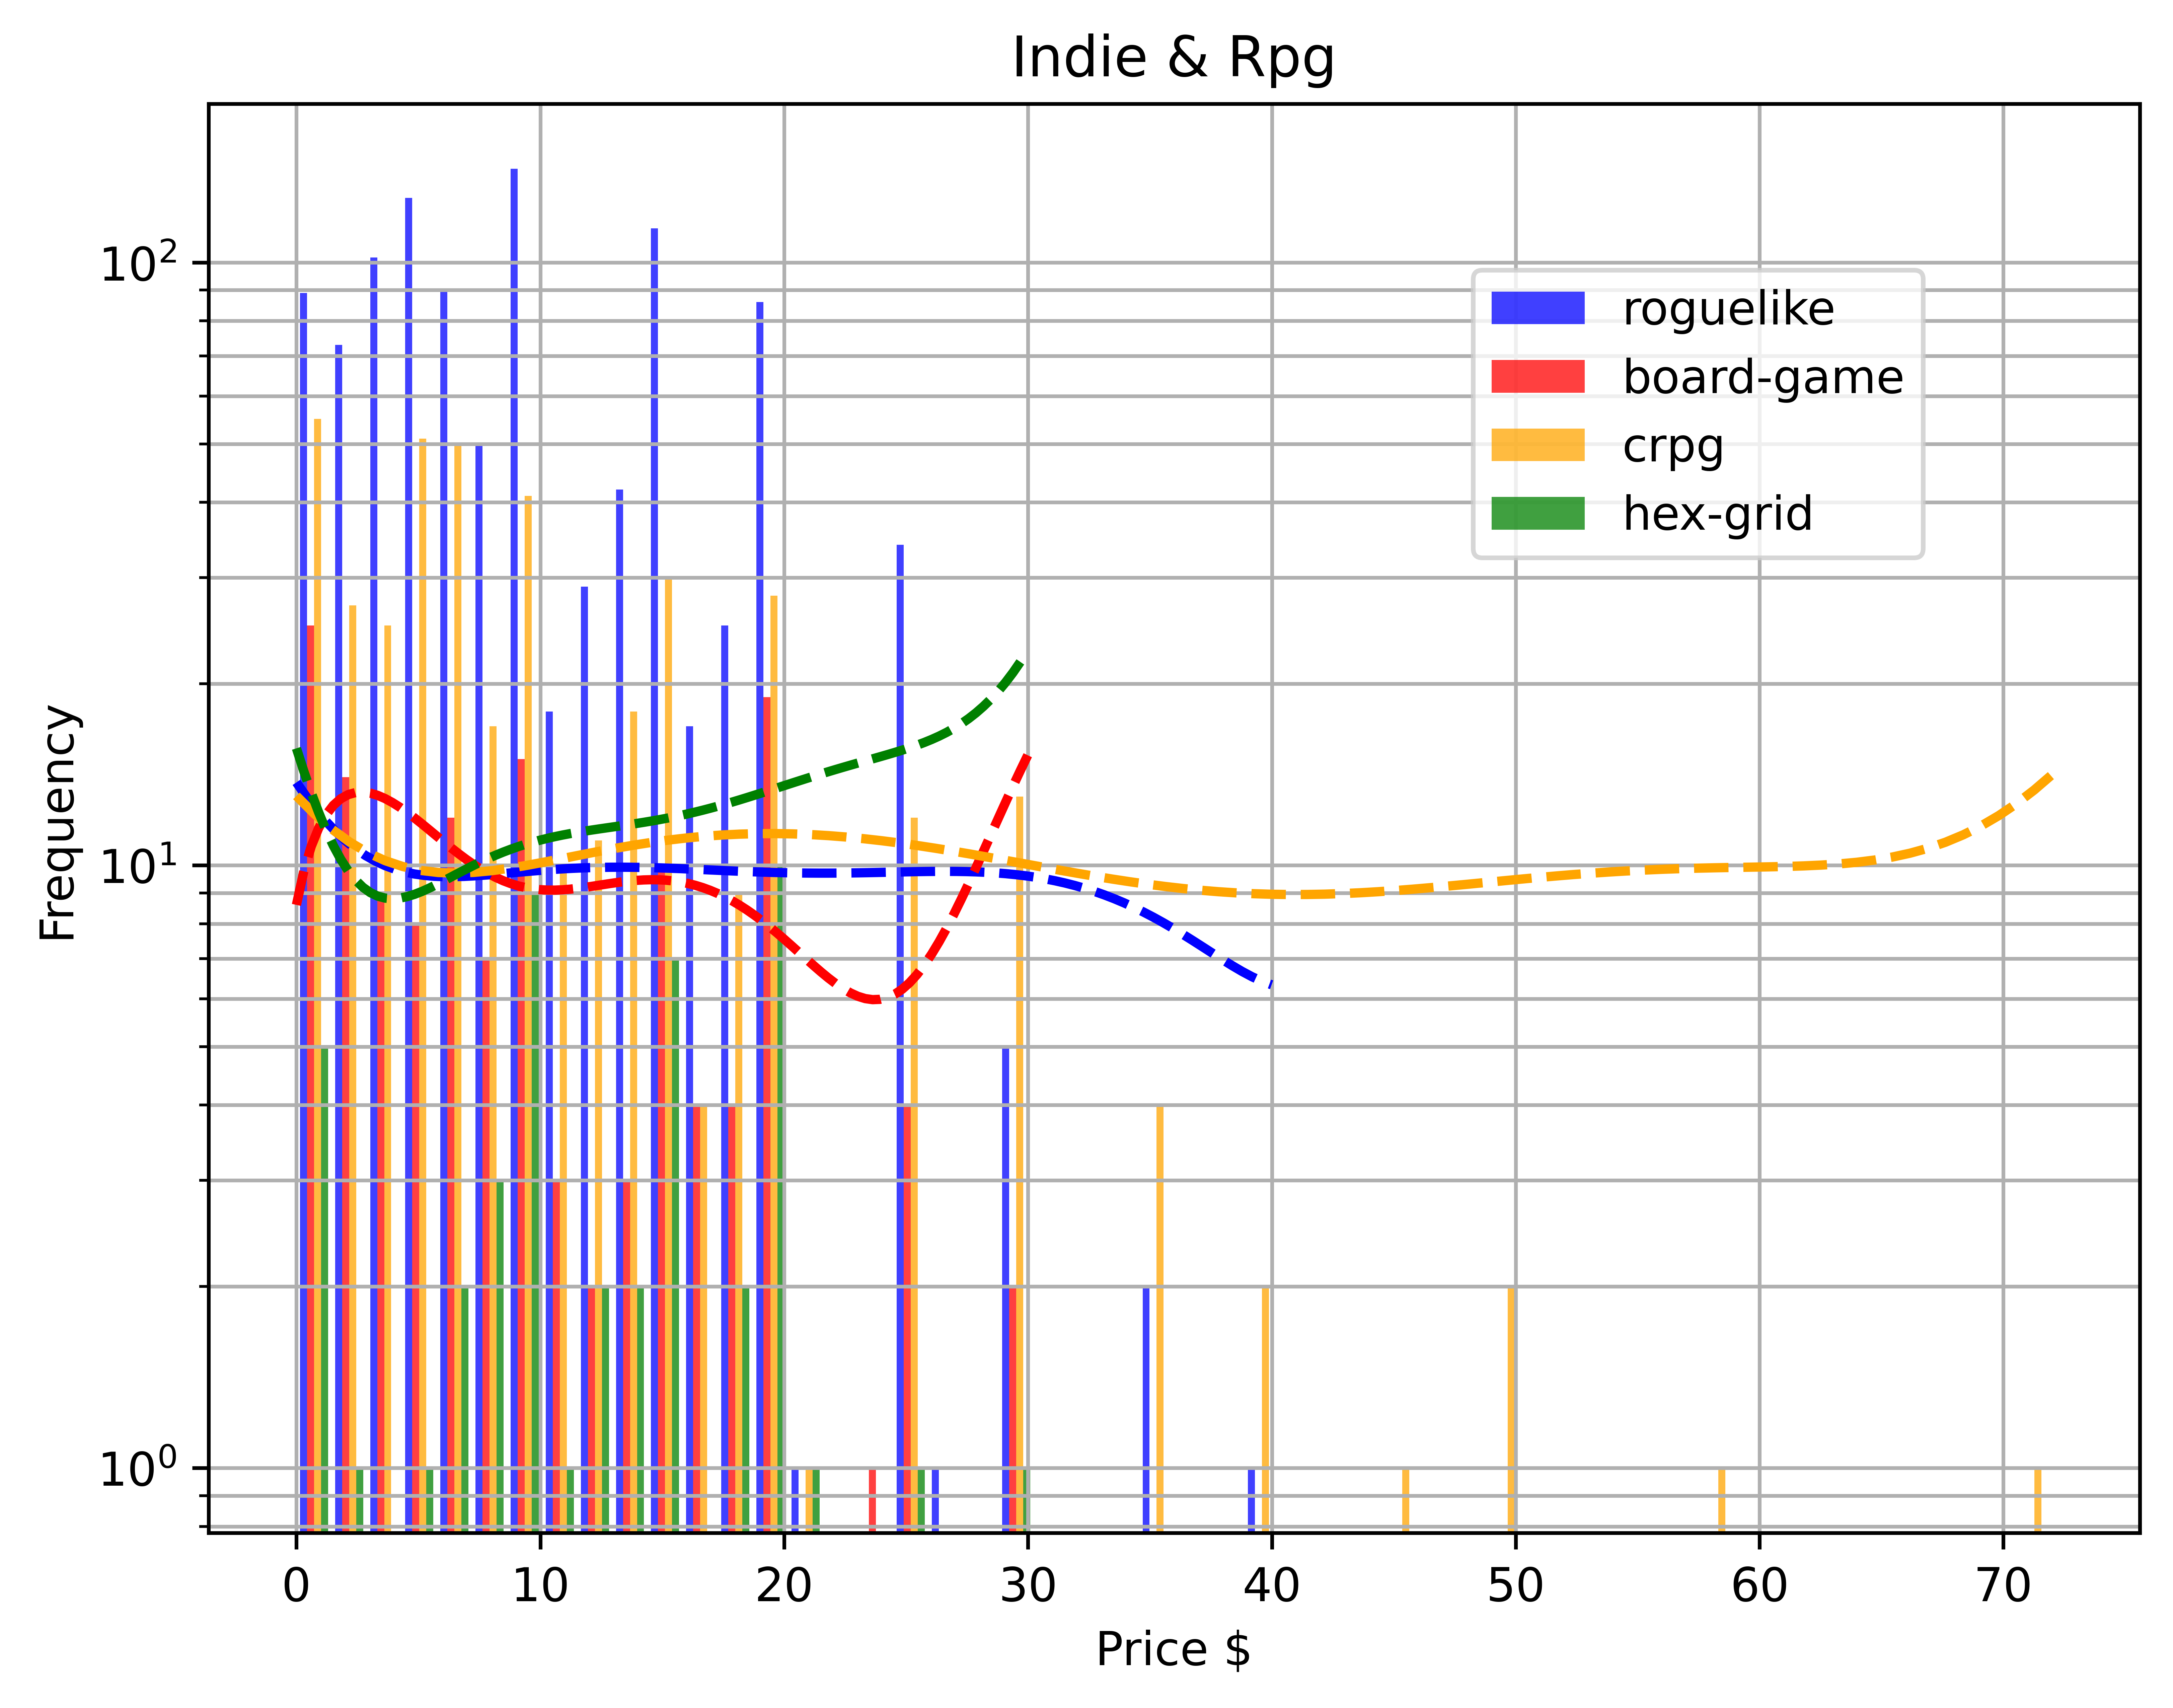

In [538]:
idx_top_genre = truthTable(idx_top_genre_indie,idx_top_genre_rpg)
result_indie_rpg_price = idx2intidx(price,idx_top_genre)

idx_crpg_top_genre = truthTable(idx_top_genre,idx_crpgs)
idx_roguelike_top_genre = truthTable(idx_top_genre,idx_roguelike)
idx_boardgame_top_genre = truthTable(idx_top_genre,idx_board_game)
idx_hex_grid_top_genre = truthTable(idx_top_genre,idx_hex_grid)

idx_crpg_price = idx2intidx(price,idx_crpg_top_genre)
idx_roguelike_price = idx2intidx(price,idx_roguelike_top_genre)
idx_boardgame_price = idx2intidx(price,idx_boardgame_top_genre)
idx_hex_grid_price = idx2intidx(price,idx_hex_grid_top_genre)

mean_price = np.mean(result_indie_rpg_price)

# plt.plot(result_indie_rpg_price,'.')
fig1 = plt.figure(dpi=1000)

# plt.loglog(result_indie_rpg_price,'b.',alpha=0.5)
plt.hist([idx_roguelike_price,idx_boardgame_price, idx_crpg_price, idx_hex_grid_price],
         bins=50,
         color=['blue', 'red', 'orange','green'],
         label=['roguelike','board-game', 'crpg', 'hex-grid'],
         alpha=0.75)

all_prices = [np.array(idx_roguelike_price) ,np.array(idx_boardgame_price),np.array(idx_crpg_price), np.array(idx_hex_grid_price)]


i = 0
for data, color in zip([idx_roguelike_price, idx_boardgame_price, idx_crpg_price, idx_hex_grid_price], ['blue', 'red', 'orange', 'green']):
    order = 6
    params = np.polyfit(np.arange(len(data)), data, order)  
    poly = np.poly1d(params)
    x = np.linspace(0, len(data) * np.max(all_prices[i]) / len(data), 100) 
    plt.semilogy(x, poly(np.linspace(0, len(data), 100)), color=color, linestyle='--', linewidth=2)
    i+=1


# plt.axhline(mean_price, c='green', label='mean price')
plt.legend(bbox_to_anchor=(0.9, 0.9), loc='best')
plt.tight_layout()
plt.title('Indie & Rpg')
plt.xlabel('Price $')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True, which="both")
plt.show()

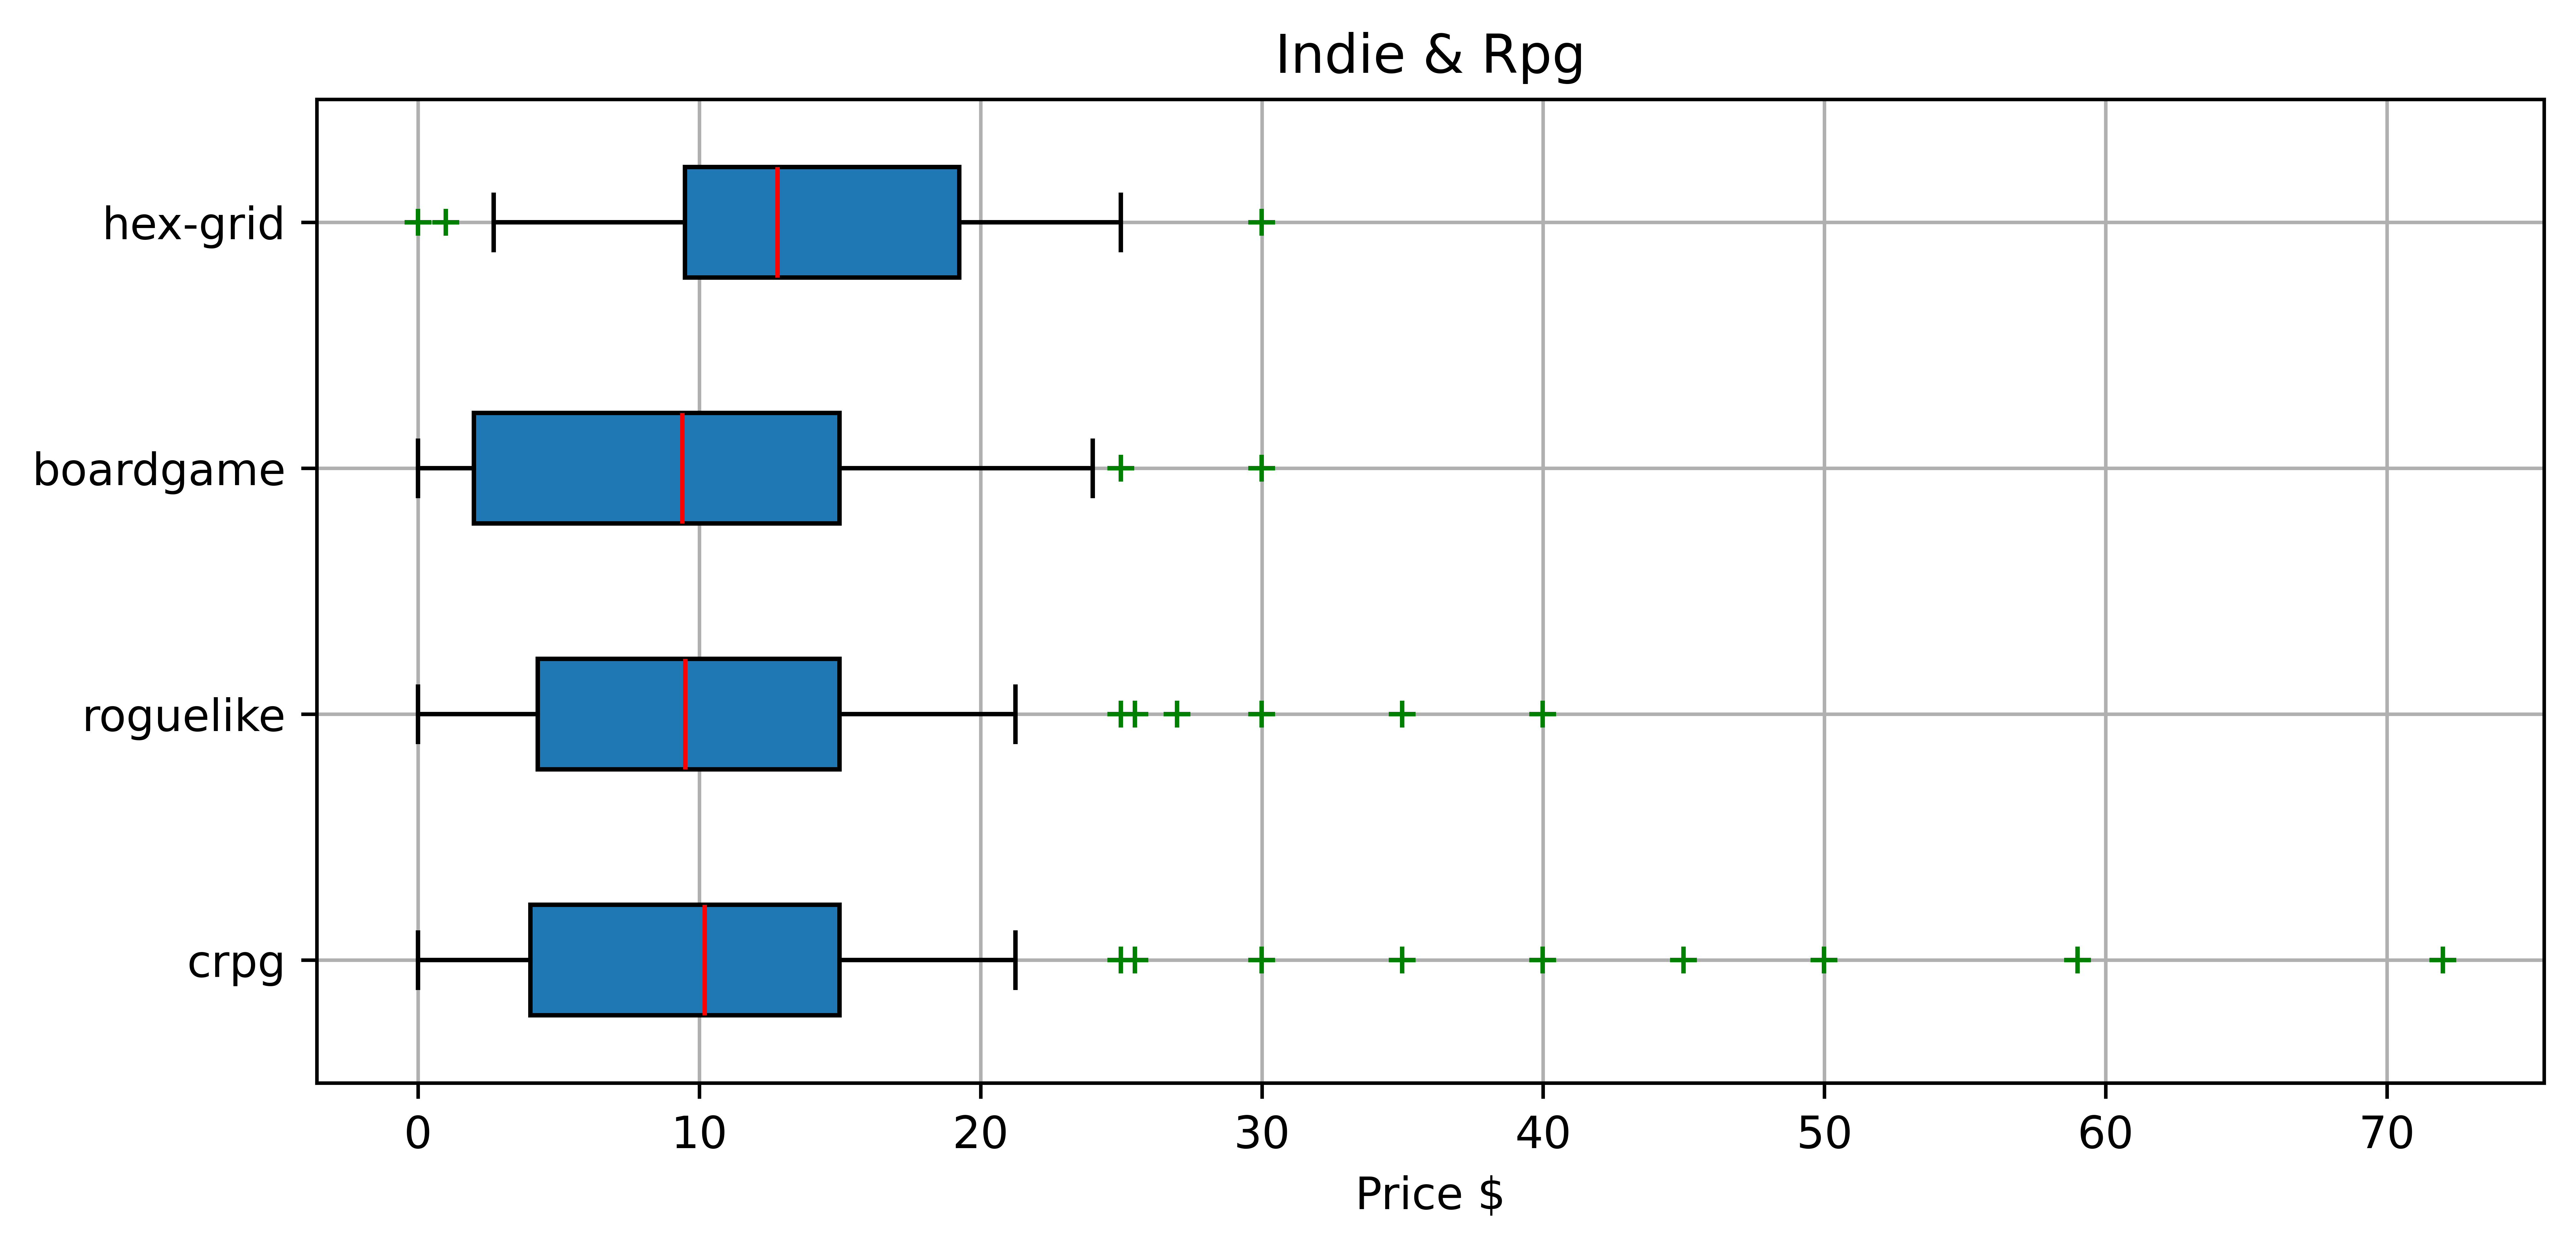

In [427]:
fig2,ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4),dpi=1000)

data = [idx_crpg_price,idx_roguelike_price,idx_boardgame_price,idx_hex_grid_price]
box_plot = ax.boxplot(data, notch=False, sym='g+', vert=False, whis=0.75, bootstrap=10000, usermedians=[np.mean(d) for d in data], conf_intervals=None, patch_artist=True)
for median in box_plot['medians']:
    median.set_color('red')

plt.title('Indie & Rpg')
plt.yticks([1,2,3,4], [ 'crpg', 'roguelike','boardgame','hex-grid'])
plt.xlabel('Price $')
plt.grid(True, which="both")

plt.show()

Coefficients from A * x + b = y  equation: 
 A : 0.05738209463042368 b 3.421768778575515
Mean of pos2neg ratings: 3.834558507058449


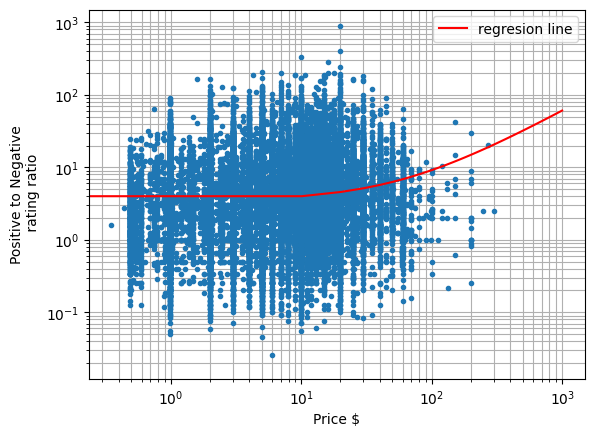

In [428]:
np.seterr(divide='ignore', invalid='ignore')
positive2negative_ratio = np.array(positive)/np.array(negative)
price = np.array(price)

plt.loglog(price,positive2negative_ratio,'.')
plt.xlabel('Price $')
plt.ylabel('Positive to Negative\n rating ratio')

positive2negative_ratio = np.nan_to_num(positive2negative_ratio,copy=True,nan=0.5,neginf=0.5,posinf=0.5)

price = np.nan_to_num(price,copy=True,nan=mean_price,neginf=mean_price,posinf=mean_price)
# print(np.isnan(price).any(),np.isinf(price).any())
order = 1
coeffs = np.polyfit(price, positive2negative_ratio, order)
print('Coefficients from A * x + b = y  equation: \n', 'A :',coeffs[0],'b',coeffs[1])

# Assumption : Probably almost no correlation because A is near 0 so y is near b
print('Mean of pos2neg ratings:',np.mean(positive2negative_ratio))
# Result : mean of the pos2neg are close to b in the linear equation so this - with high probability - is correct

poly = np.poly1d(coeffs)
x_fit = np.linspace(min(price), max(price), 100)
y_fit = poly(x_fit)
plt.loglog(x_fit, y_fit, color='red', label='regresion line')
plt.legend()
plt.grid(True, which="both")
plt.show()

In [429]:
# Hypothesis : Price has some kind of correlation with the ratings ratio (witch we now that they probably not from the previous linear fit)

import scipy.stats as st
print(':: Price vs positive to negative ratio ::\n')
# check Pearson 
pearson_outcome = st.pearsonr(price,positive2negative_ratio)
po_95 = pearson_outcome.confidence_interval(confidence_level=0.95, method=None)
print('Pearson Correlation : ',pearson_outcome[0],'\n','Confidence Interval :','\n Low : ',po_95[0],'\n High:',po_95[1])
print('Probabilty of fake relation Pearson : ', pearson_outcome[1])
# Note : almost no correlation because tPearson outcome is near 0 with confidence near received  statistics. There is almost no chance that with given test those relation are coincidence regarding Pearson correlation

# check Kendall 
kendall_outcome = st.kendalltau(price,positive2negative_ratio)
print('KendallTau Outcome:', kendall_outcome[0])
# Note : small positive value can indicate that there is some kind of relationship (0 is non-relation 1 is full relation)


# check Spearman 
spearman_outcome = st.spearmanr(price,positive2negative_ratio)
print('Spearman Outcome :',spearman_outcome[0])
print('Probabilty of fake relation Spearman : ', spearman_outcome[1])
print('\n:: Price vs positive to negative ratio ::')
# Note : Value close to zero but positive correlation exist, there is some kind of correlation between price and rating ratio. p-value indicates that there no chance that this distribution can be faked in the manner of spearman test

# Summary : Tests shows that there is maybe small correlation between price and rating but the positive correlation trend  are with high probability not related to price as much as other factors. That can indicates only, that games that are cost more - have higher quality hence better user reception of the given title, but it is not a main factor

:: Price vs positive to negative ratio ::

Pearson Correlation :  0.07786542720341708 
 Confidence Interval : 
 Low :  0.0711840978385722 
 High: 0.08453976962551128
Probabilty of fake relation Pearson :  1.4534950927368618e-114
KendallTau Outcome: 0.1581236103613262
Spearman Outcome : 0.21746084134677057
Probabilty of fake relation Spearman :  0.0

:: Price vs positive to negative ratio ::


Coefficients from A * x + b = y  equation: 
 A : 0.0008331317517029798 b 72.3054426318123

:: AVG Playtime vs metacritic score ::

Pearson Correlation :  0.14200667409039439 
 Confidence Interval : 
 Low :  0.11116324916502034 
 High: 0.17257679503704101
Probabilty of fake relation Pearson :  4.4824702458017465e-19

:: AVG Playtime vs metacritic score ::



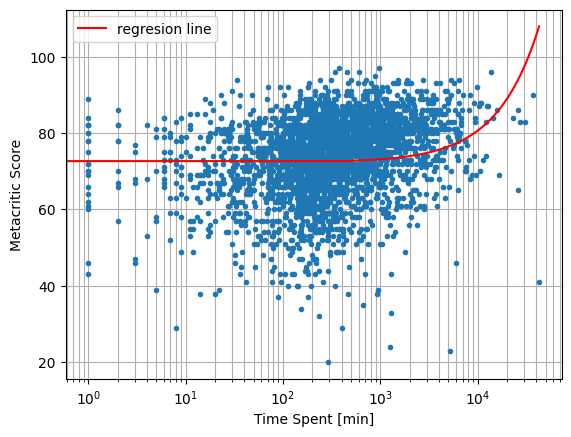

In [430]:
# Hypothesis : Score is positively correlated to average time spent and positive to negative rating
# Assumption : The metacritic and the user score are similar on mean/median

user_score = np.array(score_user)
user_score = np.nan_to_num(user_score,copy=True,nan=0.,neginf=0.,posinf=0.)
metacritic_score = np.array(score_metacritic)
metacritic_score = np.nan_to_num(metacritic_score,copy=True,nan=0.,neginf=0.,posinf=0.)

idx_non_zero_user = np.nonzero(user_score)[0]
idx_non_zero_meta = np.nonzero(metacritic_score)[0]

# Note : users on steam doesn't use scores to rating games (only pos and negs) 
# Assumption  =>> Result :  can't be validated like that -> no crossing points

averagePlaytime = np.array(averagePlaytime)
averagePlaytime = np.nan_to_num(averagePlaytime,copy=True,nan=0.,neginf=0.,posinf=0.)
idx_non_zero_avg_time = np.nonzero(averagePlaytime)[0]

plt.semilogx(averagePlaytime[idx_non_zero_meta],metacritic_score[idx_non_zero_meta],'.')

order = 1
coeffs = np.polyfit(averagePlaytime[idx_non_zero_meta], metacritic_score[idx_non_zero_meta], order)
print('Coefficients from A * x + b = y  equation: \n', 'A :',coeffs[0],'b',coeffs[1])

print('\n:: AVG Playtime vs metacritic score ::\n')

pearson_outcome = st.pearsonr(averagePlaytime[idx_non_zero_meta],metacritic_score[idx_non_zero_meta])
po_95 = pearson_outcome.confidence_interval(confidence_level=0.95, method=None)
print('Pearson Correlation : ',pearson_outcome[0],'\n','Confidence Interval :','\n Low : ',po_95[0],'\n High:',po_95[1])
print('Probabilty of fake relation Pearson : ', pearson_outcome[1])
print('\n:: AVG Playtime vs metacritic score ::\n')

poly = np.poly1d(coeffs)
x_fit = np.linspace(min(averagePlaytime[idx_non_zero_meta]), max(averagePlaytime[idx_non_zero_meta]), 100)
y_fit = poly(x_fit)
plt.semilogx(x_fit, y_fit, color='red', label='regresion line')
plt.legend()
plt.xlabel('Time Spent [min]')
plt.ylabel('Metacritic Score')
plt.grid(True, which="both")
plt.show()


# Summary : There is some positive correlation but given the fact that that A value in the linear equation make x close to zero, as before, we can assume that this correlation is small if there is one at all. Intuitively we can assume that good game can be both short and long and is more or less independent in the context of the game score

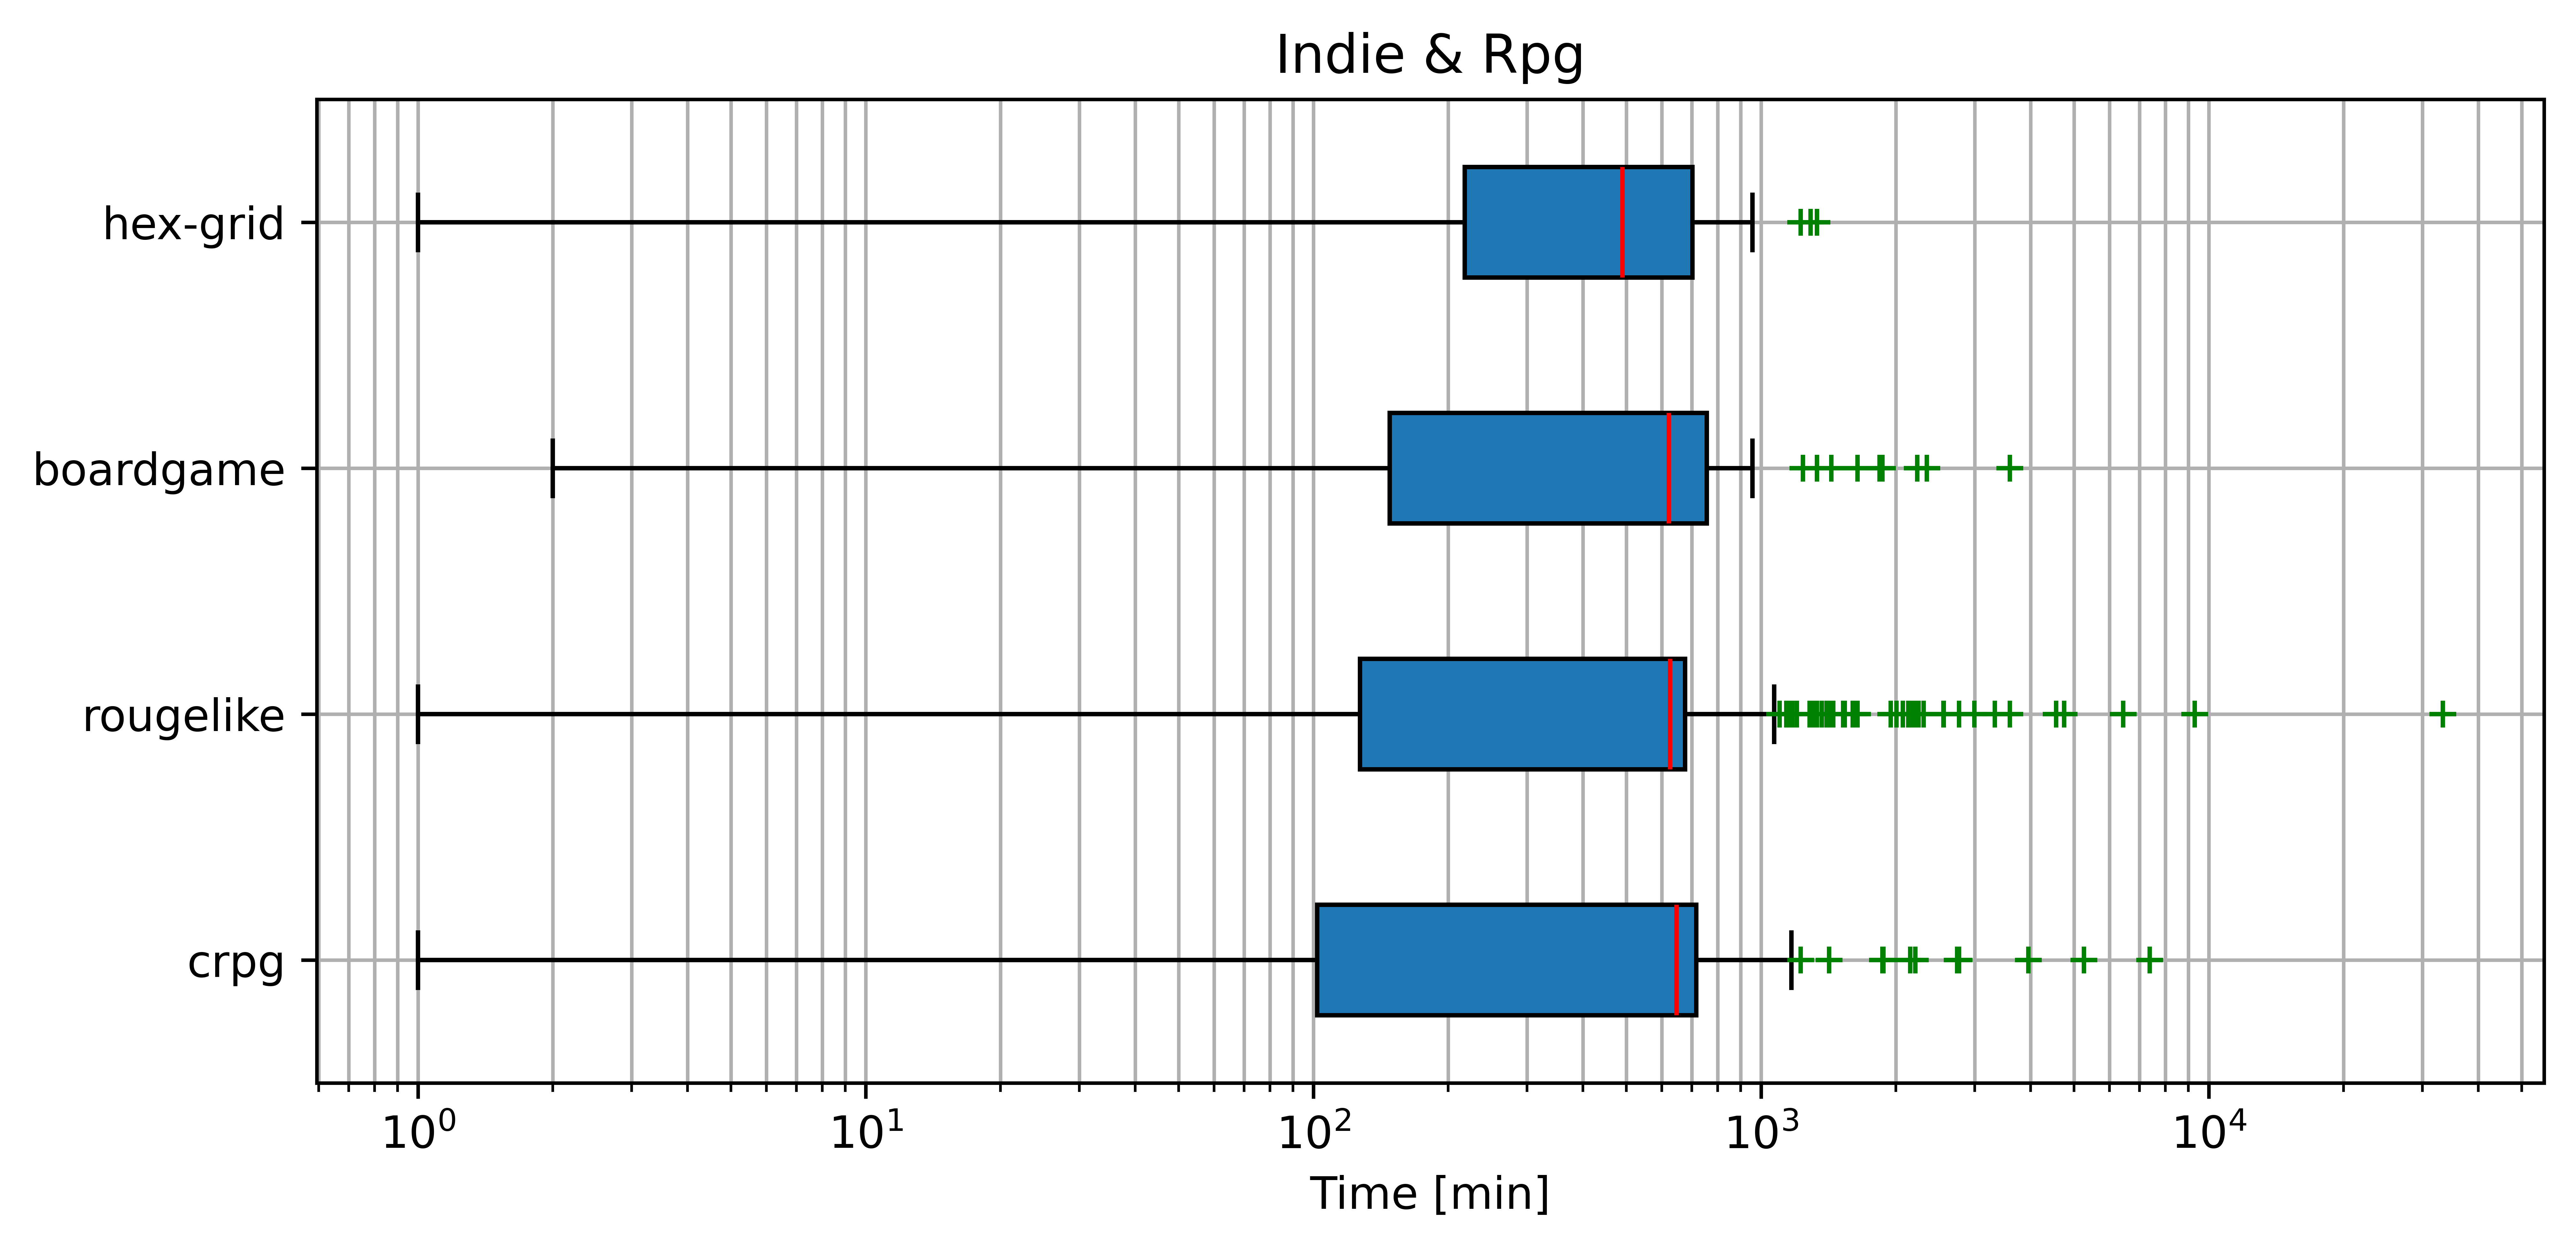

In [431]:
# Hypothesis : Time spent is correlated strongly with genre?
# Assumption : We are interested in the core of our genres so RPG and INDIE with subgenre of : 'crpg', 'roguelike','boardgame','hex-grid'
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4),dpi=1000)

idx_crpg_avg_time = truthTable(idx_crpg_top_genre,idx_non_zero_avg_time)
idx_roguelike_avg_time = truthTable(idx_roguelike_top_genre,idx_non_zero_avg_time)
idx_boardgame_avg_time = truthTable(idx_boardgame_top_genre,idx_non_zero_avg_time)
idx_hex_grid_avg_time = truthTable(idx_hex_grid_top_genre,idx_non_zero_avg_time)


data = [averagePlaytime[idx_crpg_avg_time],averagePlaytime[idx_roguelike_avg_time],averagePlaytime[idx_boardgame_avg_time],averagePlaytime[idx_hex_grid_avg_time]]


box_plot = ax.boxplot(data, notch=False, sym='g+', vert=False, whis=0.75, bootstrap=10000, usermedians=[np.mean(d) for d in data], conf_intervals=None, patch_artist=True)
for median in box_plot['medians']:
    median.set_color('red')

plt.title('Indie & Rpg')
plt.yticks([1,2,3,4], [ 'crpg', 'rougelike','boardgame','hex-grid'])
plt.xlabel('Time [min]')
plt.grid(True, which="both")
plt.xscale('log')
plt.show()

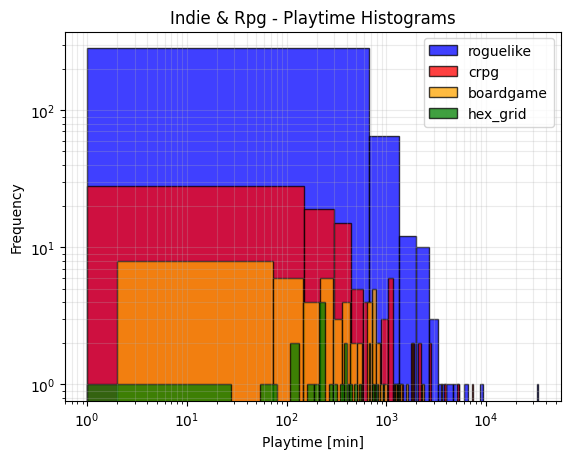

In [432]:

plt.hist(averagePlaytime[idx_roguelike_avg_time], label='roguelike', color='blue',bins=50, alpha=0.75, edgecolor='black')
plt.hist(averagePlaytime[idx_crpg_avg_time], label='crpg', bins=50,color='red', alpha=0.75, edgecolor='black')
plt.hist(averagePlaytime[idx_boardgame_avg_time], label='boardgame', color='orange',bins=50, alpha=0.75, edgecolor='black')
plt.hist(averagePlaytime[idx_hex_grid_avg_time], label='hex_grid', color='green',bins=50, alpha=0.75, edgecolor='black')
plt.grid(True)
plt.legend()
plt.title('Indie & Rpg - Playtime Histograms')
plt.xlabel('Playtime [min]')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", alpha=0.25)
plt.show()

# Result : times comparison shows : roguelike > crpg > boardgame > hex_grid!

# Summary : In the box plot above there is mean playtime approx. the same but below on the histogram we can see that roguelike games genre is order of magnitude more time consuming for the players in frequency than the other genres, witch means in the order of importance we should focus on genres : roguelike > crpg > boardgame > hex_grid. This will give us more oportunity to sell our products inside the game. Also this shows that there is more game accordingly to those genres that have higher frequency and playtime witch also means those types sell more often.


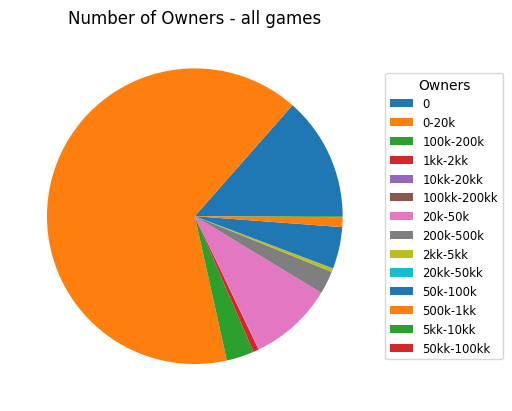

In [470]:
# Hypothesis : Number of owners grow with the lowering playtime
owners_number = np.array(owners_number)
unique_values, counts = np.unique(owners_number, return_counts=True)

plt.title("Number of Owners - all games")
unique_values = ['0','0-20k','100k-200k','1kk-2kk','10kk-20kk','100kk-200kk','20k-50k','200k-500k','2kk-5kk','20kk-50kk','50k-100k','500k-1kk','5kk-10kk','50kk-100kk']
plt.pie(counts,labels=['']* len(unique_values))
plt.legend(labels=unique_values,title="Owners", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')

plt.show()

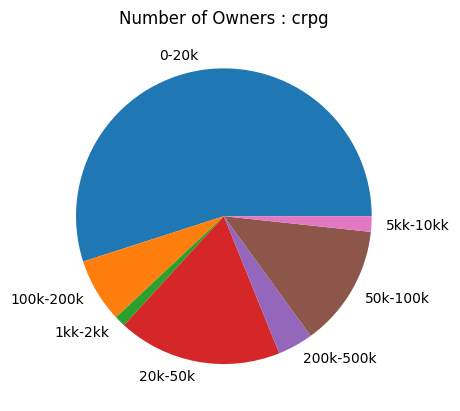

In [493]:
owners_crpg = owners_number[idx_crpg_top_genre]

unique_values_crpg, counts_crpg = np.unique(owners_crpg, return_counts=True)
unique_values_crpg = ['0-20k','100k-200k','1kk-2kk','20k-50k','200k-500k','50k-100k','5kk-10kk']
plt.title("Number of Owners : crpg")

plt.pie(counts_crpg,labels=unique_values_crpg)
plt.show()


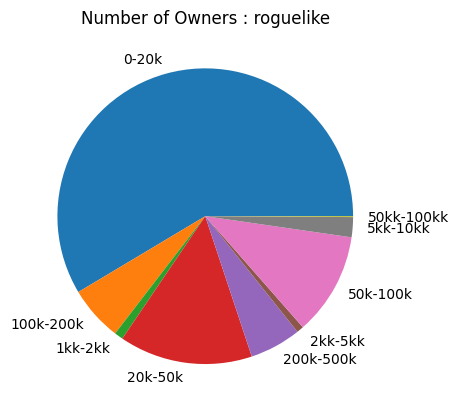

In [487]:
owners_roguelike = owners_number[idx_roguelike_top_genre]

unique_values_rogue, counts_rogue = np.unique(owners_roguelike, return_counts=True)
unique_values_rogue = ['0-20k','100k-200k','1kk-2kk','20k-50k','200k-500k','2kk-5kk','50k-100k','5kk-10kk','50kk-100kk']
plt.title("Number of Owners : roguelike")

plt.pie(counts_rogue,labels=unique_values_rogue)
plt.show()

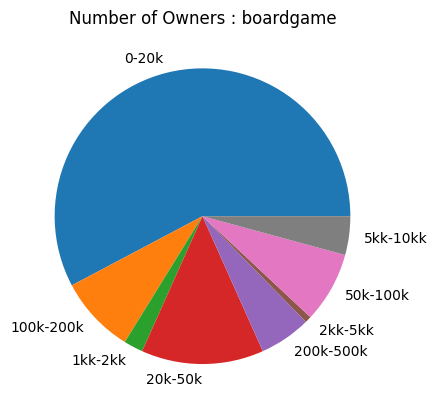

In [486]:
owners_boardgame = owners_number[idx_boardgame_top_genre]

unique_values_boardgame, counts_boardgame = np.unique(owners_boardgame, return_counts=True)
unique_values_boardgame = ['0-20k','100k-200k','1kk-2kk','20k-50k','200k-500k','2kk-5kk','50k-100k','5kk-10kk']
plt.title("Number of Owners : boardgame")

plt.pie(counts_boardgame,labels=unique_values_boardgame)
plt.show()

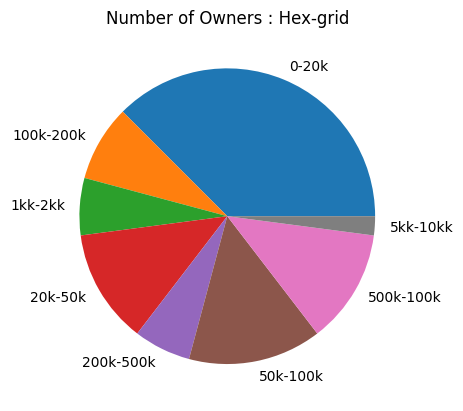

In [492]:
owners_hex_grid = owners_number[idx_hex_grid_top_genre]

unique_values_hex_grid, counts_hex_grid = np.unique(owners_hex_grid, return_counts=True)
unique_values_hex_grid = ['0-20k','100k-200k','1kk-2kk','20k-50k','200k-500k','50k-100k','500k-100k','5kk-10kk']
plt.title("Number of Owners : Hex-grid")

plt.pie(counts_hex_grid,labels=unique_values_hex_grid)
plt.show()

In [ ]:
# TODO : Comparision between those four genere and owner base count

In [434]:
# Hypothesis : Single player and multiplayer/co-op games has roughly similar average time spent hence there is no correlation between game player type 